<a href="https://colab.research.google.com/github/KeerthanaKambham/Neural_Networks/blob/main/animal_detection_using_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.2 MB/s eta 0:00:00



0: 448x640 1 cat, 1 dog, 134.4ms
Speed: 2.1ms preprocess, 134.4ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
=== DETECTIONS ===
1. dog  -->  confidence = 0.87
2. cat  -->  confidence = 0.74


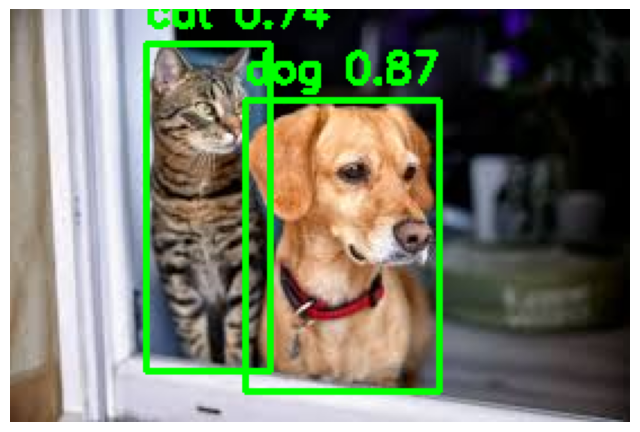

In [8]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 1. Load YOLOv8 model
model = YOLO("yolov8n.pt")

# 2. Load image (dog + cat)
image_path = "/content/animal3.jpeg"   # <-- change to your file name
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"Could not read image: {image_path}")

# 3. Run detection
# conf = min confidence
# iou  = how much overlap allowed between boxes (lower = fewer duplicates)
results = model(img, conf=0.5, iou=0.4)

result = results[0]

print("=== DETECTIONS ===")
for i, box in enumerate(result.boxes, start=1):
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    label = model.names[cls_id]
    print(f"{i}. {label}  -->  confidence = {conf:.2f}")

    x1, y1, x2, y2 = box.xyxy[0].int().tolist()
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.putText(img, f"{label} {conf:.2f}", (x1, y1 - 8),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

# 4. Show result
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()